# UCI Bank Marketing Dataset - Using XGBoost

## 1. Dataset Overview
The dataset contains information about marketing campaign contacts and demographic details. Each row represents a contact with a client, and the target variable `y` indicates whether they subscribed (`yes`) or not (`no`).

In [4]:
import pandas as pd

# Load dataset - ensure `bank-full.csv` is in the same directory or adjust the path
df = pd.read_csv('bank-full.csv', sep=';')
#https://drive.google.com/file/d/16xDiX8aiRsrimQBxaKrF7iGtZl2cifzI/view?usp=sharing
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.isnull().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [8]:
df.shape

(45211, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df["pdays"]=df["pdays"].apply(lambda x:"non-contacted" if x==-1 else "contacted")

In [14]:
cat_columns = df.dtypes[df.dtypes == 'object'].index
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pdays', 'poutcome', 'y'],
      dtype='object')

In [16]:
num_columns = df.dtypes[df.dtypes == 'int64'].index
num_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')

## EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

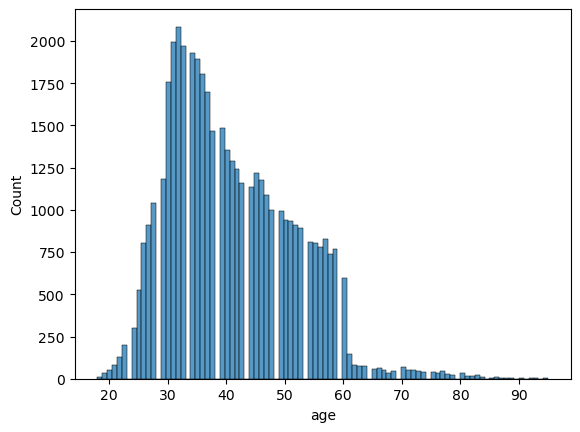

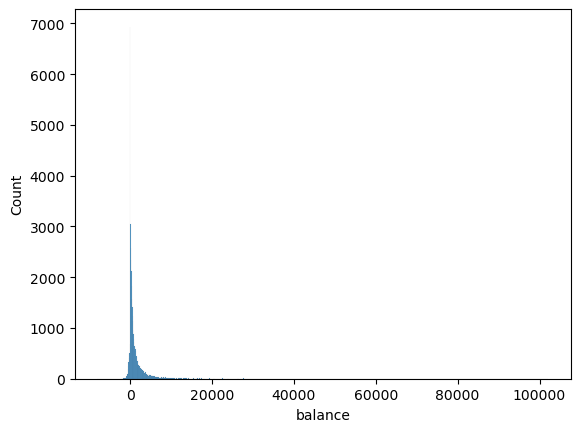

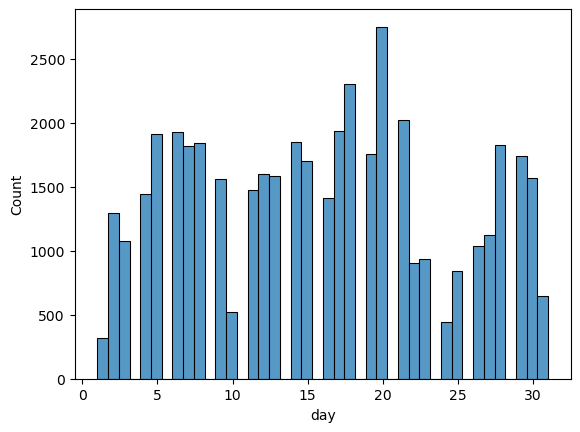

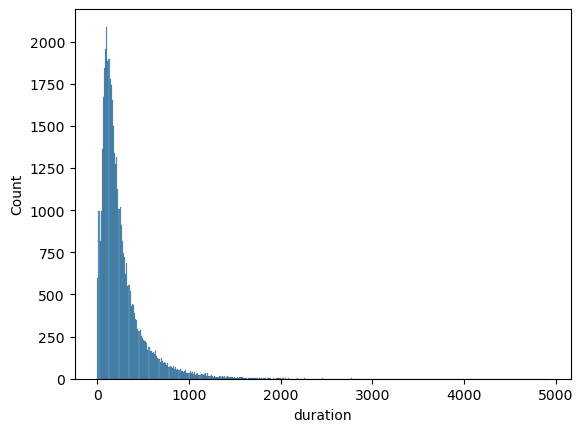

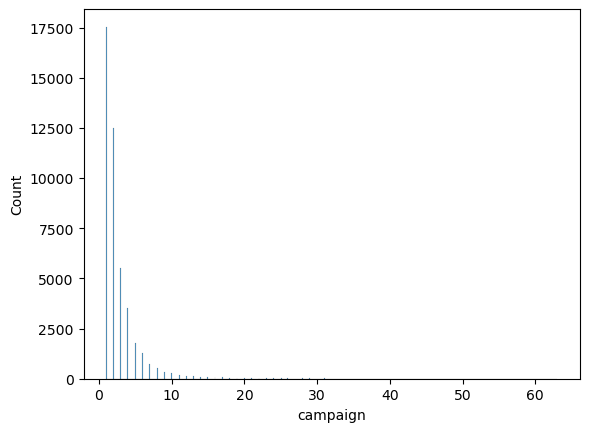

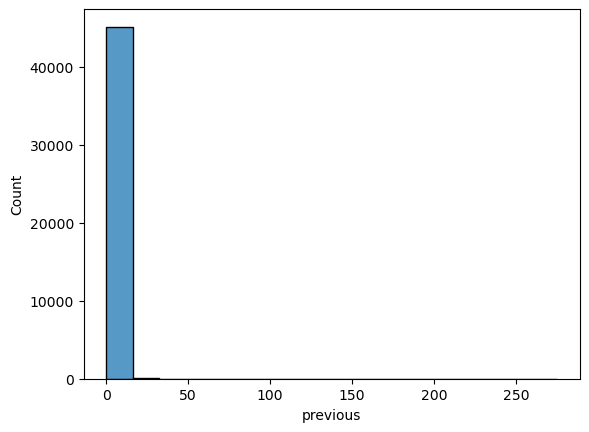

In [22]:
for col in num_columns:
    sns.histplot(x=df[col])
    plt.show()

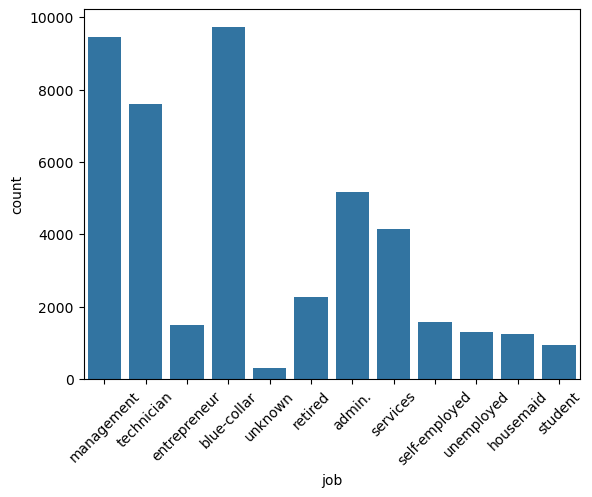

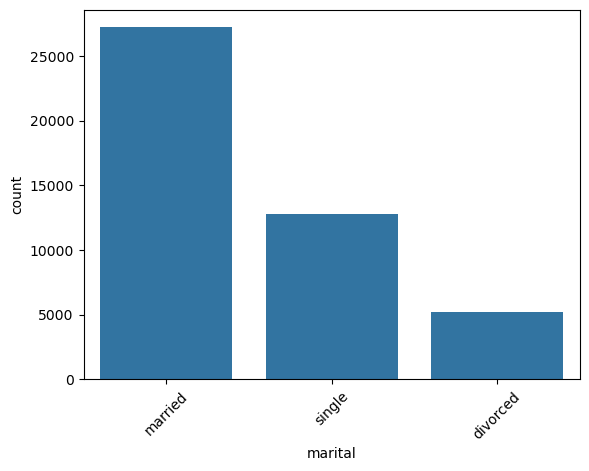

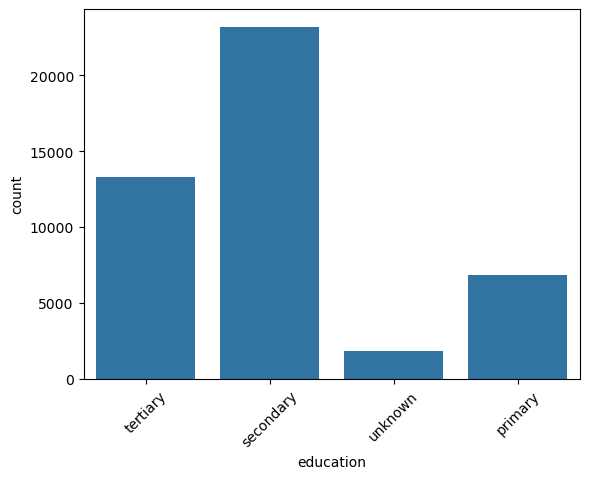

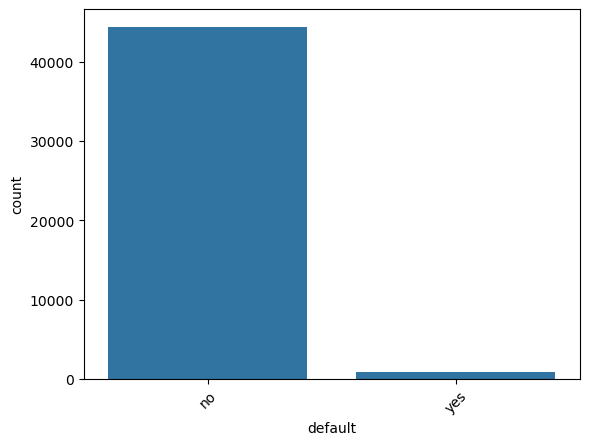

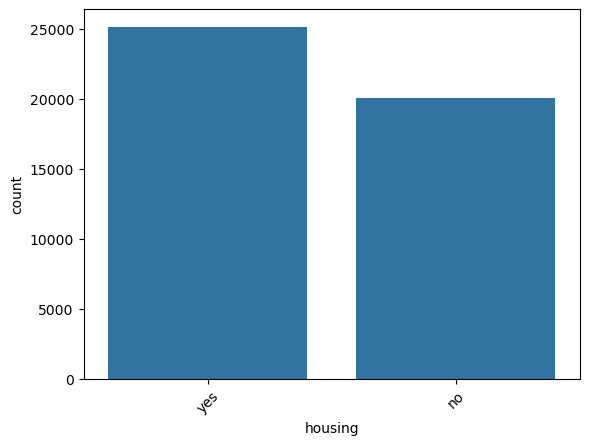

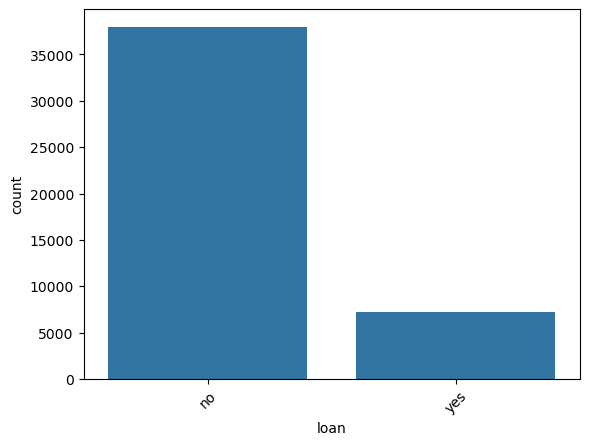

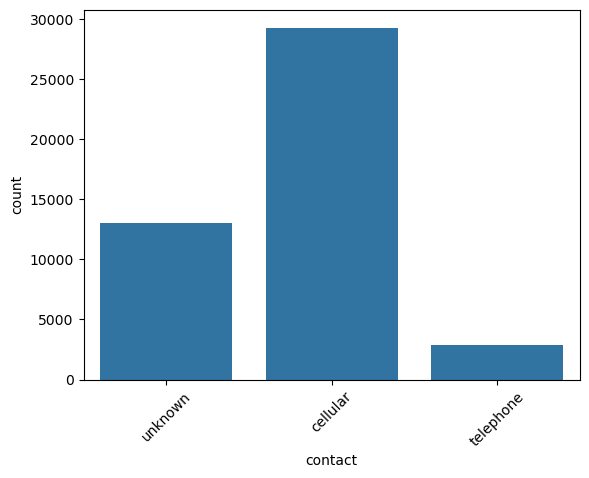

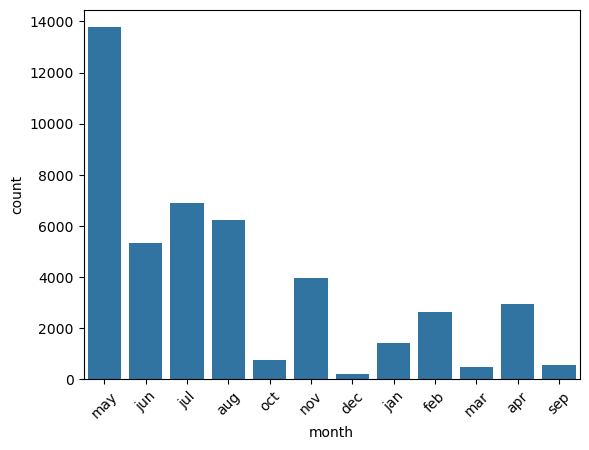

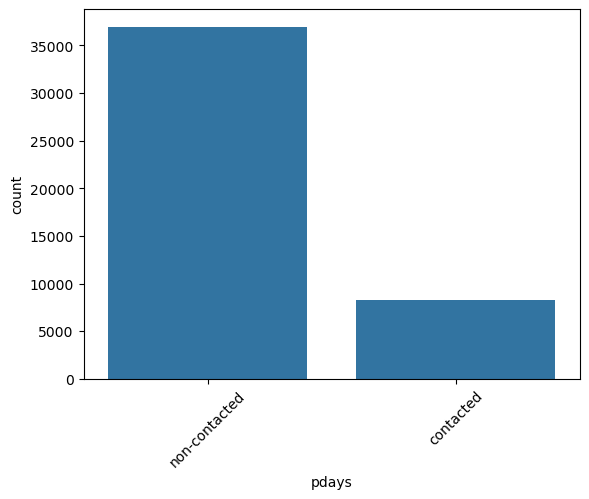

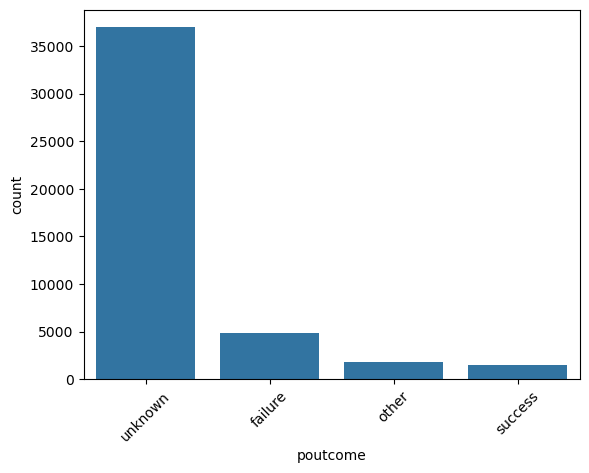

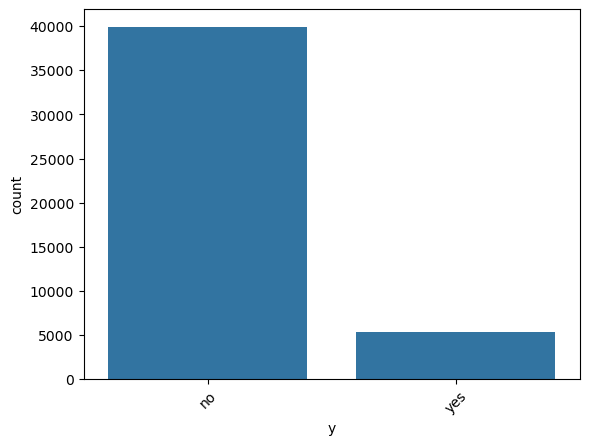

In [24]:
for col in cat_columns:
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

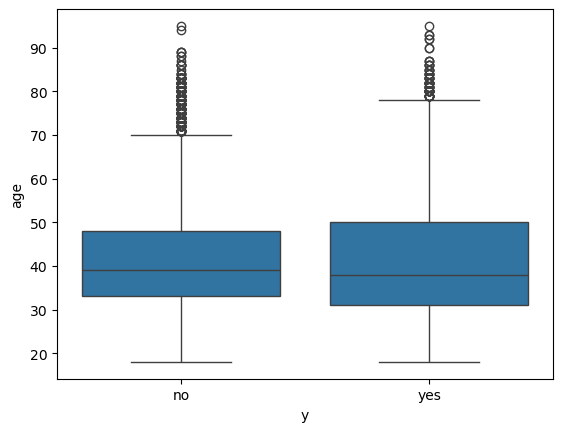

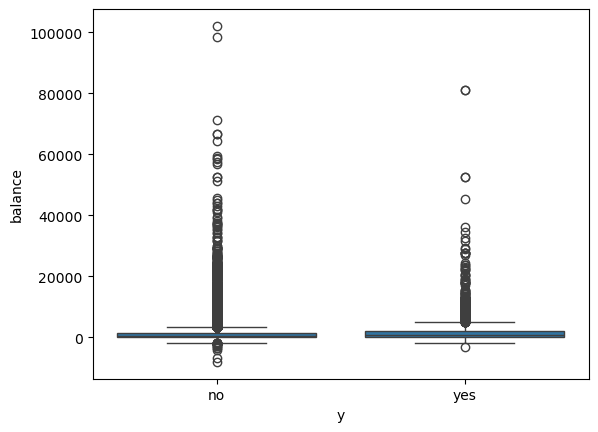

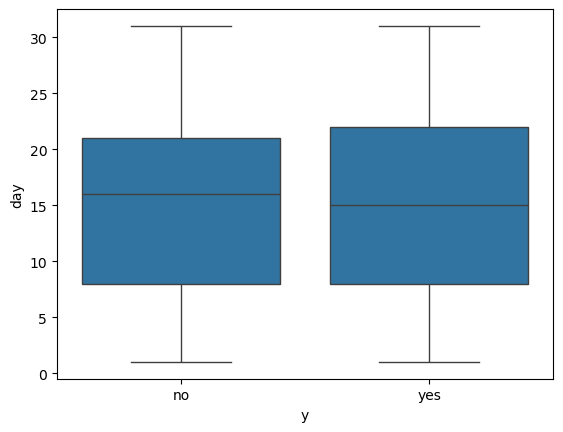

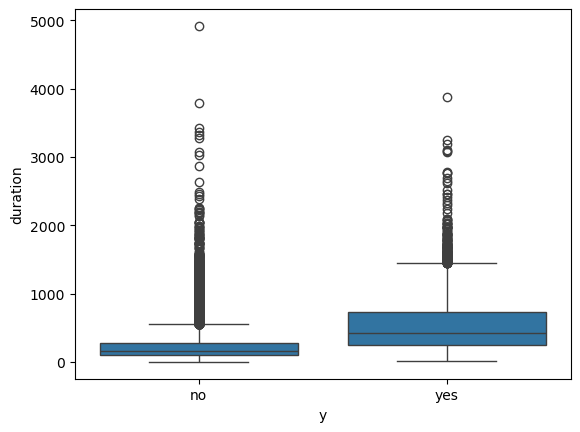

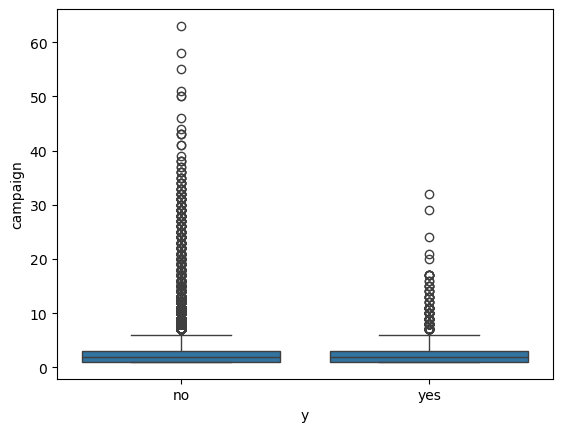

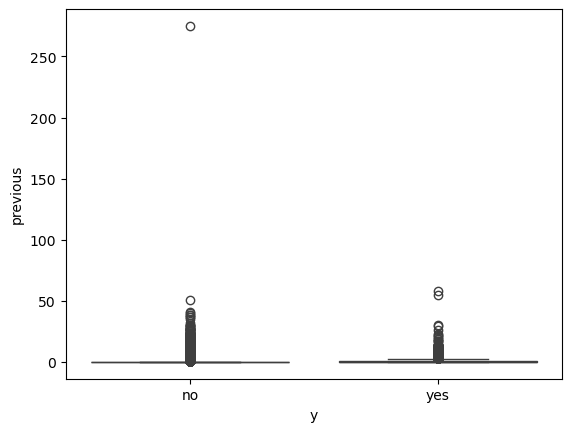

In [27]:
for col in num_columns:
    sns.boxplot(x=df["y"],y=df[col])
    plt.show()

### Multivariate Analysis

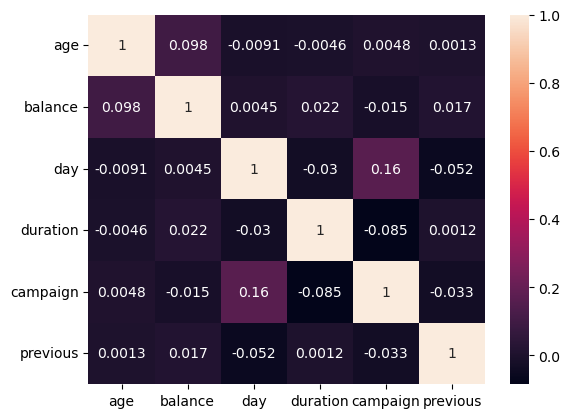

In [30]:
sns.heatmap(df[num_columns].corr(),annot=True)
plt.show()

## Data Preprocessing

### Key Points:
- Scaling is not mandatory in tree models.
- Missing Value Imputation is not mandatory in tree models.
- Outlier Treatment is not mandatory in tree models.
- Dummy value creation is not required in tree models.

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,non-contacted,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,non-contacted,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,non-contacted,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,non-contacted,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,non-contacted,0,unknown,no


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [42]:
label_enc_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in label_enc_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,1,0,3,0


In [46]:
X = df.drop(columns=['y'])
y = df['y']

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)

(36168, 16)
(9043, 16)


In [54]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.9 MB/s eta 0:00:00


In [56]:
from xgboost import XGBClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [60]:
%%time
dt_model.fit(X_train, y_train)

CPU times: user 177 ms, sys: 4.9 ms, total: 182 ms
Wall time: 182 ms


DecisionTreeClassifier()

In [64]:
from sklearn.metrics import accuracy_score

In [66]:
# Predictions and accuracy
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Initial Model Train Accuracy: {train_accuracy}')
print(f'Initial Model Test Accuracy: {test_accuracy}')

Initial Model Train Accuracy: 1.0
Initial Model Test Accuracy: 0.8675218400973128


In [68]:
xgb_model = XGBClassifier()

In [70]:
%%time
xgb_model.fit(X_train, y_train)

CPU times: user 740 ms, sys: 168 ms, total: 908 ms
Wall time: 224 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

In [74]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Initial Model Train Accuracy: {train_accuracy}')
print(f'Initial Model Test Accuracy: {test_accuracy}')

Initial Model Train Accuracy: 0.9533012607830126
Initial Model Test Accuracy: 0.9052305650779608


In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

In [80]:
xgb_model = XGBClassifier()

In [82]:
%%time
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

CPU times: user 1.19 s, sys: 1.09 s, total: 2.28 s
Wall time: 12.7 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [ ]:
# Try the same parameters with GBM and compare the training time - HW